In [2]:
import pandas as pd
import math
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
acc=pd.read_csv("accounts.csv")
trans=pd.read_csv("transactions.csv")

In [4]:
acc.head(5)

,id_bank_account,max_date,balance
0,1777,2023-10-11 22:00:00,-15.24
1,1778,2024-03-03 23:00:00,-443.17
2,1780,2024-03-03 23:00:00,2925.13
3,1781,2023-07-16 22:00:00,53.28
4,1785,2024-02-20 23:00:00,118.67


In [5]:
acc.dtypes

id_bank_account      int64
max_date            object
balance            float64
dtype: object

In [6]:
acc.shape

(31436, 3)

In [7]:
trans.dtypes

id_bank_account      int64
date                object
amount             float64
category_l1         object
category_l2         object
dtype: object

In [8]:
trans.shape

(3470566, 5)

In [6]:
nombre_uniques = acc['id_bank_account'].nunique()
print("Nombre d'id_bank_account uniques dans la base account :", nombre_uniques)

Nombre d'id_bank_account uniques dans la base account : 31436


In [5]:
nombre_uniques = trans['id_bank_account'].nunique()
print("Nombre d'id_bank_account uniques dans la base transactions  :", nombre_uniques)

Nombre d'id_bank_account uniques dans la base transactions  : 16051


Nous observons que, dans la base de données des comptes, il y a **31,436** id_bank_account uniques, tandis que dans la base de données des transactions, nous trouvons uniquement **16,051** id_bank_account distincts. <u>Cela indique que certains comptes dans notre base de données n'ont pas de transactions associées</u>. Par conséquent, nous prendrons en compte uniquement ces **16,051** transactions pour nos analyses futures

In [185]:
trans.head(5)

,id_bank_account,date,amount,category_l1,category_l2
0,2012,2021-03-29 22:00:00,-35.78,loan,consumerCredit
1,12244,2023-02-13 23:00:00,-120.00,NaN,NaN
2,17632,2022-12-21 23:00:00,-7.79,unindentifiedPayments,thirdParty
3,1935,2022-01-30 23:00:00,200.00,interPersonalTransfer,NaN
4,19696,2022-07-24 22:00:00,-3.99,brands,retail


In [12]:
acc.head()

,id_bank_account,max_date,balance
0,1777,2023-10-11 22:00:00,-15.24
1,1778,2024-03-03 23:00:00,-443.17
2,1780,2024-03-03 23:00:00,2925.13
3,1781,2023-07-16 22:00:00,53.28
4,1785,2024-02-20 23:00:00,118.67


# Reduction de la base account

In [9]:
transaction_unique = trans['id_bank_account'].unique()
account= acc[acc['id_bank_account'].isin(transaction_unique)]

In [10]:
account.shape

(10577, 3)

In [11]:
id_unique = acc['id_bank_account'].unique()
transaction= trans[trans['id_bank_account'].isin(id_unique)]

In [12]:
transaction.shape

(3277707, 5)

In [13]:
transaction["id_bank_account"].nunique()

10577

count    1.057700e+04
mean     5.524084e+03
std      1.275550e+05
min     -5.507157e+04
25%      1.680000e+00
50%      3.838700e+02
75%      1.661190e+03
max      1.238459e+07
Name: balance, dtype: float64


/tmp/ipykernel_2166/1374752463.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(account.balance,bins=10,label='Balance')


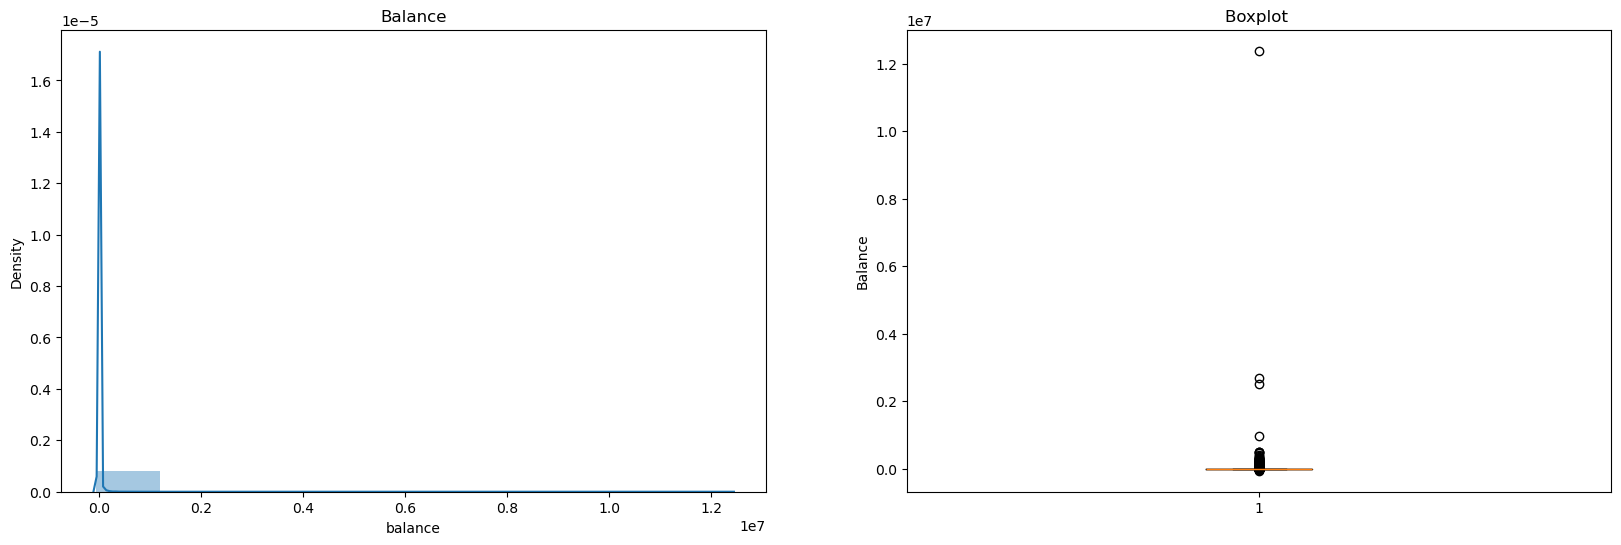

In [18]:
#Apercu générale sur la variable
print(account['balance'].describe())

plt.figure(figsize=(20,6))

#Distribution de la variable
plt.subplot(1,2,1)
sns.distplot(account.balance,bins=10,label='Balance')
plt.title('Balance')



plt.subplot(1,2,2)
plt.boxplot(account["balance"])  
plt.title('Boxplot ')
plt.ylabel('Balance') 


# Afficher le graphique
plt.show()

In [19]:
print(trans['category_l1'].value_counts(dropna=False))

category_l1
brands                   932707
NaN                      754827
unindentifiedPayments    258937
smallShops               177624
insurance                175557
personalTransfer         165349
incomes                  153989
ATM                      133517
interPersonalTransfer    122374
loan                     121581
telecom                  115545
bankFees                  99594
energy                    54966
taxes                     45777
overdraft                 42108
savings                   38595
gambling                  29878
loanSuspicion             18688
rent                       9010
rejection                  7877
videoGames                 7169
water                      4244
alimony                     402
fraud                       251
Name: count, dtype: int64


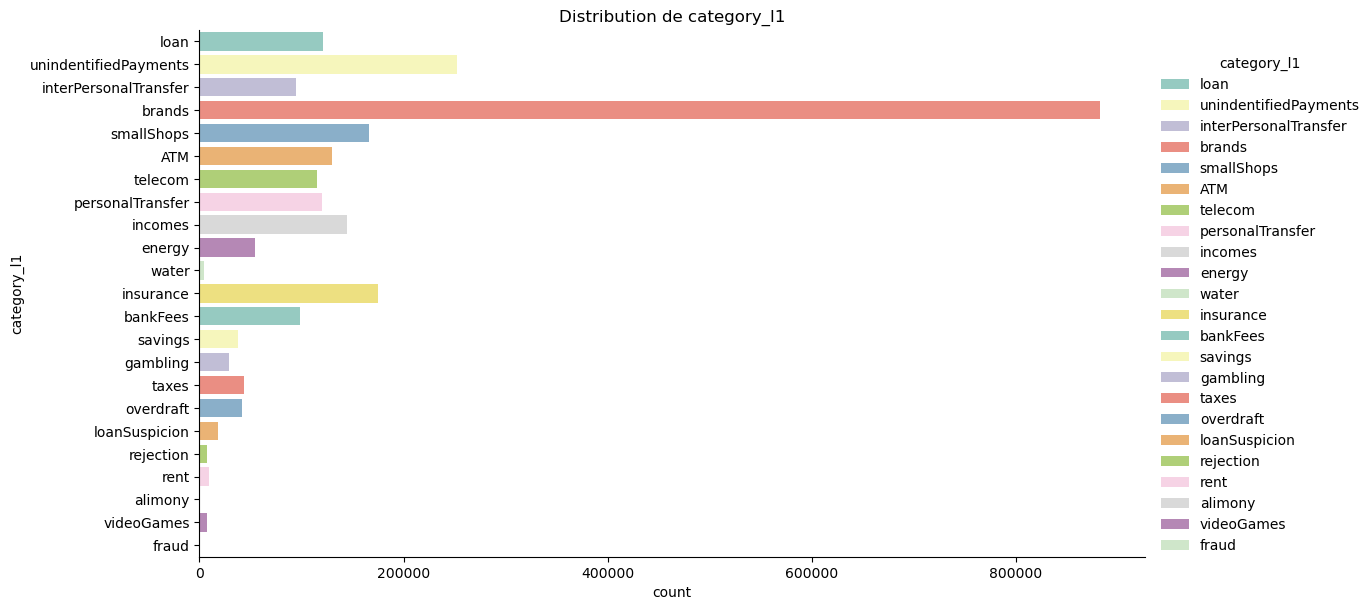

In [20]:
sns.catplot(y='category_l1', kind='count', data=transaction, hue='category_l1', palette='Set3', height=6, aspect=2)

# Réglages esthétiques
plt.title('Count de category_l1')
plt.show()

In [21]:
print(trans['category_l2'].value_counts(dropna=False))

category_l2
NaN                                                                                     1566745
retail                                                                                   563597
thirdParty                                                                               159471
transport                                                                                117758
check                                                                                     75330
                                                                                         ...   
Prélèvement de solidarité sur les revenus du patrimoine et les produits de placement         49
CRDS                                                                                         43
turnoverFees                                                                                 13
creditFees                                                                                    5
Taxe foncière               

In [22]:
transaction['category_l2'].nunique()

102

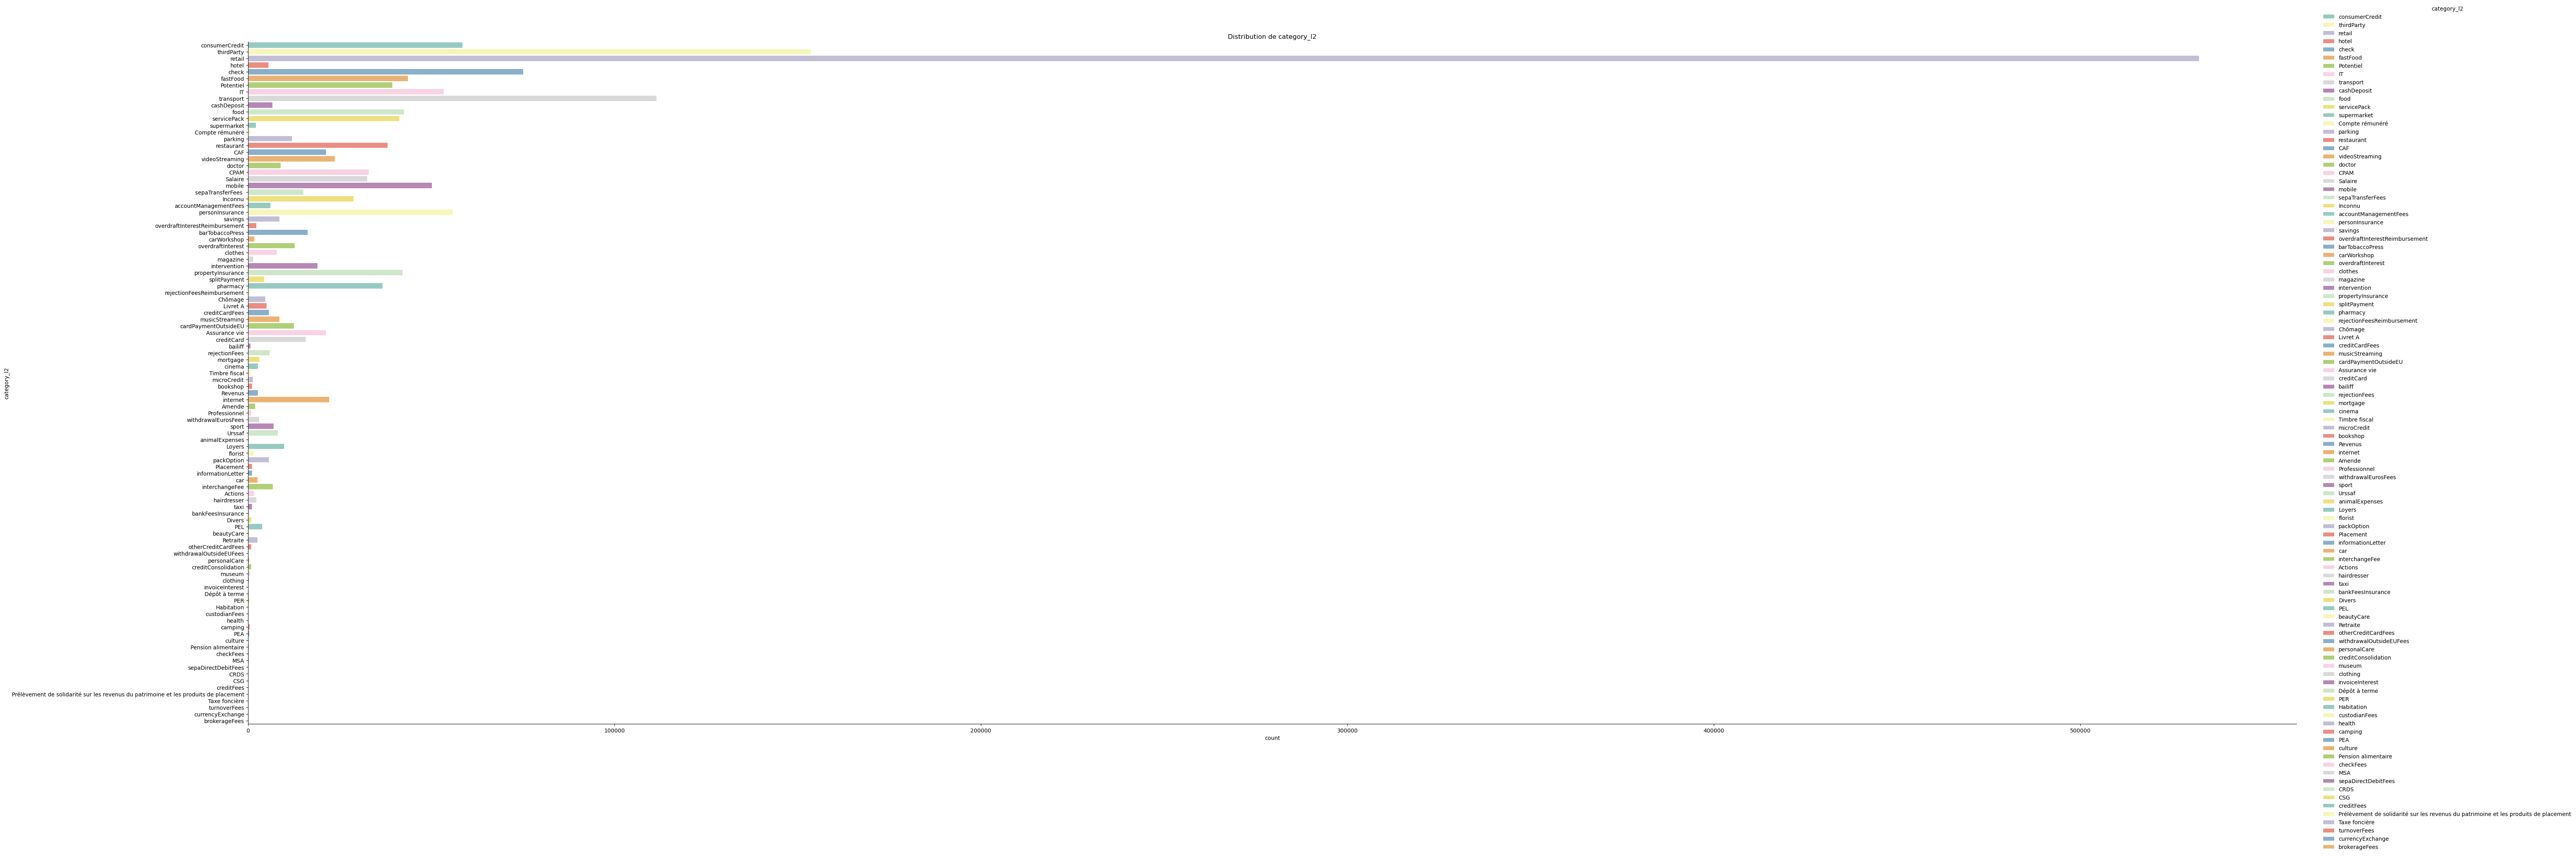

In [23]:
sns.catplot(y='category_l2', kind='count', data=transaction, hue='category_l2', palette='Set3', height=20, aspect=3)

# Réglages esthétiques
plt.title('Count de category_l2')
plt.show()

In [14]:
transaction = transaction.sort_values(by='id_bank_account')

In [13]:
transaction.head()

,id_bank_account,date,amount,category_l1,category_l2
515469,1777,2021-12-06 23:00:00,-6.99,unindentifiedPayments,thirdParty
1437333,1777,2022-04-03 22:00:00,-2.99,unindentifiedPayments,thirdParty
1437298,1777,2021-12-06 23:00:00,200.00,unindentifiedPayments,cashDeposit
1437308,1777,2022-04-26 22:00:00,1662.93,incomes,Potentiel
1469211,1777,2022-07-03 22:00:00,-2.99,unindentifiedPayments,thirdParty


In [14]:
account.head()

,id_bank_account,max_date,balance
0,1777,2023-10-11 22:00:00,-15.24
1,1778,2024-03-03 23:00:00,-443.17
2,1780,2024-03-03 23:00:00,2925.13
3,1781,2023-07-16 22:00:00,53.28
4,1785,2024-02-20 23:00:00,118.67


In [15]:
# Convert the Date column to a datetime data type
transaction['date'] = pd.to_datetime(transaction['date'])
account.loc[:, 'max_date'] = pd.to_datetime(account['max_date'])

In [16]:
max(transaction[transaction["id_bank_account"]==1780]["date"])

Timestamp('2024-03-03 23:00:00')

**Défaut**

In [18]:
def Défaut(id_bank): 
    Transaction_id = transaction[transaction['id_bank_account'] == id_bank]
    
    date_max = Transaction_id["date"].max()
    
    D = Transaction_id[(Transaction_id["category_l1"] == "rejection") &
                       (date_max - Transaction_id["date"] <= datetime.timedelta(days=360))]
    
    # Vérification du nombre de rejets
    if len(D) >= 3:
        return 1
    else:
        return 0

In [19]:
account.loc[:, 'defaut'] = account['id_bank_account'].apply(Défaut)

/tmp/ipykernel_6846/79672427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account.loc[:, 'defaut'] = account['id_bank_account'].apply(Défaut)


In [20]:
account["defaut"].value_counts()

defaut
0    10207
1      370
Name: count, dtype: int64

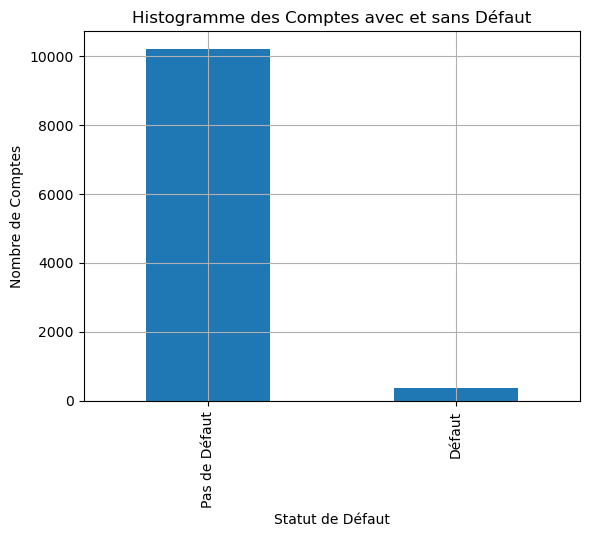

In [21]:
account['defaut'].value_counts().plot(kind='bar', alpha=1, grid=True)


plt.title('Histogramme des Comptes avec et sans Défaut')
plt.xlabel('Statut de Défaut')
plt.ylabel('Nombre de Comptes')
plt.xticks(ticks=[0, 1], labels=['Pas de Défaut', 'Défaut'])  
plt.show()

# Création de sous-comptes sur une période de 15 mois

In [17]:
transactions_segmentées = pd.DataFrame()
for compte in account['id_bank_account'] :
    
    max_date = transaction[transaction['id_bank_account'] == compte]['date'].max()
    min_date = transaction[transaction['id_bank_account'] == compte]['date'].min()
    
    #nombre de périodes de 15 mois 
    n = ((max_date - min_date) // datetime.timedelta(days=450))
    
    current_max_date = max_date
    start_date = current_max_date - datetime.timedelta(days=450)
    while (n>=1):
        period_transactions = transaction[(transaction['id_bank_account'] == compte) &
                                           (transaction['date'] >= start_date) &
                                           (transaction['date'] <= current_max_date)].copy()
        
        #Identifiant
        period_id = f"{compte}-{n}"

        period_transactions['new_id'] = period_id
    
        transactions_segmentées = pd.concat([transactions_segmentées, period_transactions])
        
        
        current_max_date  -= datetime.timedelta(days=451)
        start_date = current_max_date - datetime.timedelta(days=450)
        n -= 1


#transactions_segmentées.reset_index(drop=True, inplace=True)



In [18]:
transactions_segmentées.head(20)

,id_bank_account,date,amount,category_l1,category_l2,new_id
591450,1777,2023-05-29 22:00:00,-6.99,brands,retail,1777-1
1425092,1777,2022-11-13 23:00:00,3.03,unindentifiedPayments,thirdParty,1777-1
3209564,1777,2022-08-30 22:00:00,-50.00,personalTransfer,NaN,1777-1
3457522,1777,2022-10-12 22:00:00,-68.29,unindentifiedPayments,check,1777-1
2180673,1777,2022-10-30 23:00:00,-36.98,brands,retail,1777-1
3104263,1777,2022-10-16 22:00:00,-11.99,brands,retail,1777-1
3104634,1777,2022-11-02 23:00:00,60.00,unindentifiedPayments,cashDeposit,1777-1
1449967,1777,2022-10-03 22:00:00,-37.00,smallShops,barTobaccoPress,1777-1
779081,1777,2023-04-11 22:00:00,5.48,NaN,NaN,1777-1
1561597,1777,2022-12-25 23:00:00,-650.00,savings,Livret A,1777-1


In [19]:
transactions_segmentées[transactions_segmentées["new_id"]=="1785-2"]

,id_bank_account,date,amount,category_l1,category_l2,new_id
583522,1785,2023-10-01 22:00:00,60.00,NaN,NaN,1785-2
2922571,1785,2023-09-24 22:00:00,118.00,NaN,NaN,1785-2
2893247,1785,2022-12-11 23:00:00,-234.23,loan,NaN,1785-2
1816442,1785,2024-01-18 23:00:00,-4.20,bankFees,accountManagementFees,1785-2
2460831,1785,2023-06-07 22:00:00,148.00,NaN,NaN,1785-2
...,...,...,...,...,...,...
1460554,1785,2023-09-03 22:00:00,-161.60,unindentifiedPayments,check,1785-2
1161570,1785,2023-08-31 22:00:00,174.00,NaN,NaN,1785-2
2517249,1785,2023-04-16 22:00:00,-4.20,bankFees,accountManagementFees,1785-2
2351802,1785,2023-03-16 23:00:00,-162.61,unindentifiedPayments,check,1785-2


In [20]:
account_segmentées = transactions_segmentées[['new_id']].drop_duplicates()

In [21]:
account_segmentées

,new_id
591450,1777-1
970890,1778-2
1957925,1778-1
1295105,1780-3
3470536,1780-2
...,...
513059,66054-1
458077,66786-1
2872200,66855-1
1734081,67332-1


In [22]:
def remplire_max_date(cmpte):
    return transactions_segmentées["date"][transactions_segmentées['new_id']==cmpte].max()


In [23]:
account_segmentées.loc[:, 'max_date'] = account_segmentées['new_id'].apply(remplire_max_date)

In [24]:
account_segmentées

,new_id,max_date
591450,1777-1,2023-10-11 22:00:00
970890,1778-2,2024-03-03 23:00:00
1957925,1778-1,2022-12-08 23:00:00
1295105,1780-3,2024-03-03 23:00:00
3470536,1780-2,2022-12-06 23:00:00
...,...,...
513059,66054-1,2024-03-03 23:00:00
458077,66786-1,2024-02-25 23:00:00
2872200,66855-1,2024-02-29 23:00:00
1734081,67332-1,2024-02-26 23:00:00


### Défaut

In [25]:
def Défaut(id_bank): 
    Transaction_id = transactions_segmentées[transactions_segmentées['new_id'] == id_bank]
    
    date_max = Transaction_id["date"].max()
    
    D = Transaction_id[(Transaction_id["category_l1"] == "rejection") &
                       (Transaction_id["date"] >= date_max - datetime.timedelta(days=360))]
    
    # Vérification du nombre de rejets
    if len(D) >= 3:
        return 1
    else:
        return 0

In [26]:
account_segmentées.loc[:, 'defaut'] = account_segmentées['new_id'].apply(Défaut)

In [27]:
account_segmentées

,new_id,max_date,defaut
591450,1777-1,2023-10-11 22:00:00,0
970890,1778-2,2024-03-03 23:00:00,0
1957925,1778-1,2022-12-08 23:00:00,0
1295105,1780-3,2024-03-03 23:00:00,0
3470536,1780-2,2022-12-06 23:00:00,0
...,...,...,...
513059,66054-1,2024-03-03 23:00:00,0
458077,66786-1,2024-02-25 23:00:00,0
2872200,66855-1,2024-02-29 23:00:00,0
1734081,67332-1,2024-02-26 23:00:00,0


In [28]:
account_segmentées['defaut'].value_counts()

defaut
0    3854
1     130
Name: count, dtype: int64

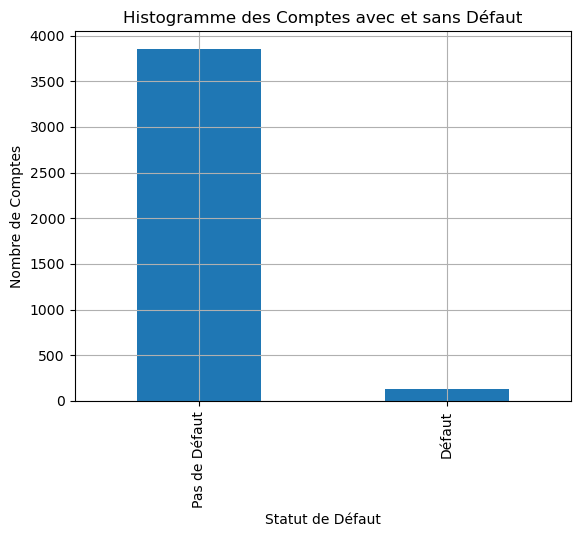

In [29]:
account_segmentées['defaut'].value_counts().plot(kind='bar', alpha=1, grid=True)


plt.title('Histogramme des Comptes avec et sans Défaut')
plt.xlabel('Statut de Défaut')
plt.ylabel('Nombre de Comptes')
plt.xticks(ticks=[0, 1], labels=['Pas de Défaut', 'Défaut'])  
plt.show()

### Nombre de rejets sur les 3 derniers mois.

In [30]:
def Reject_3_moins(id_bank): 
    a=0
    
    Transaction_id = transactions_segmentées[transactions_segmentées['new_id'] == id_bank]
    
    date_max = Transaction_id["date"].max()
    
    D = Transaction_id[(Transaction_id["category_l1"] == "rejection") &  
                       ( Transaction_id["date"] < date_max -  datetime.timedelta(days=360))]
   
    return (len(D)+a)

In [31]:
account_segmentées.loc[:, 'Nbre_rejection_3M'] = account_segmentées['new_id'].apply(Reject_3_moins)

In [32]:
account_segmentées["Nbre_rejection_3M"].value_counts()

Nbre_rejection_3M
0     3888
1       32
2       12
4       10
3       10
6        4
10       4
8        3
7        3
11       3
5        3
28       2
22       2
15       2
9        2
12       1
13       1
19       1
17       1
Name: count, dtype: int64

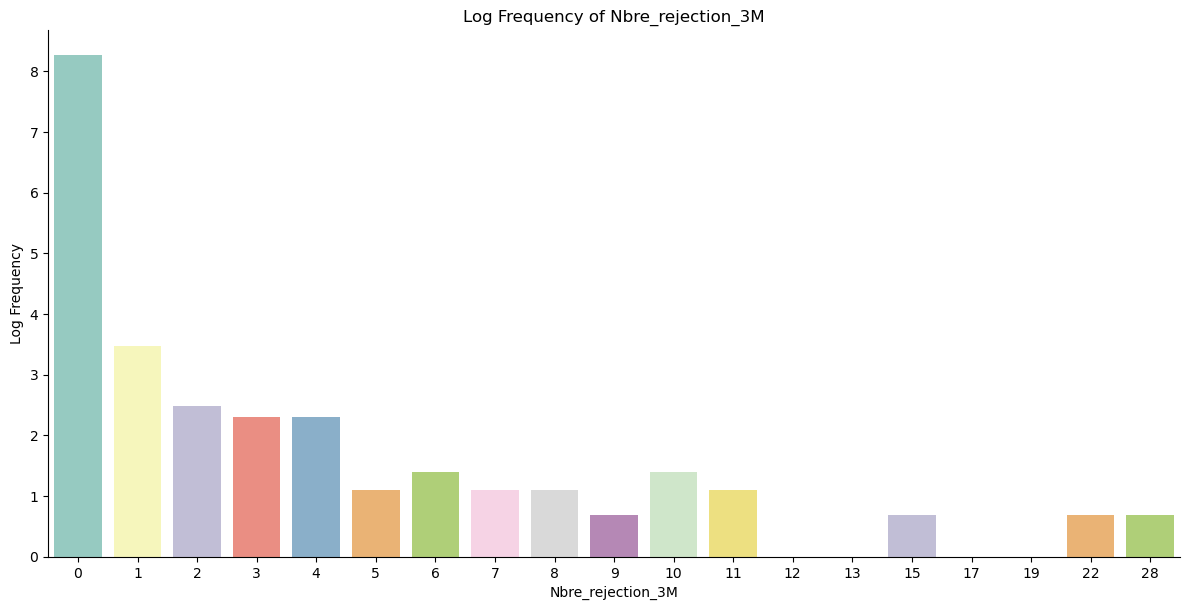

In [33]:
account_segmentées["Nbre_rejection_3M"].value_counts()

counts=account_segmentées["Nbre_rejection_3M"].value_counts()
df_counts = pd.DataFrame({'Nbre_rejection_3M': counts.index, 'Frequency': counts.values})

df_counts['Log_Frequency'] = np.log(df_counts['Frequency'])

# Tracé du catplot
sns.catplot(y='Log_Frequency', x='Nbre_rejection_3M', kind='bar', data=df_counts, hue='Nbre_rejection_3M', legend=False, palette='Set3', height=6, aspect=2)

plt.title('Log Frequency of Nbre_rejection_3M')
plt.xlabel('Nbre_rejection_3M')
plt.ylabel('Log Frequency')
plt.show()

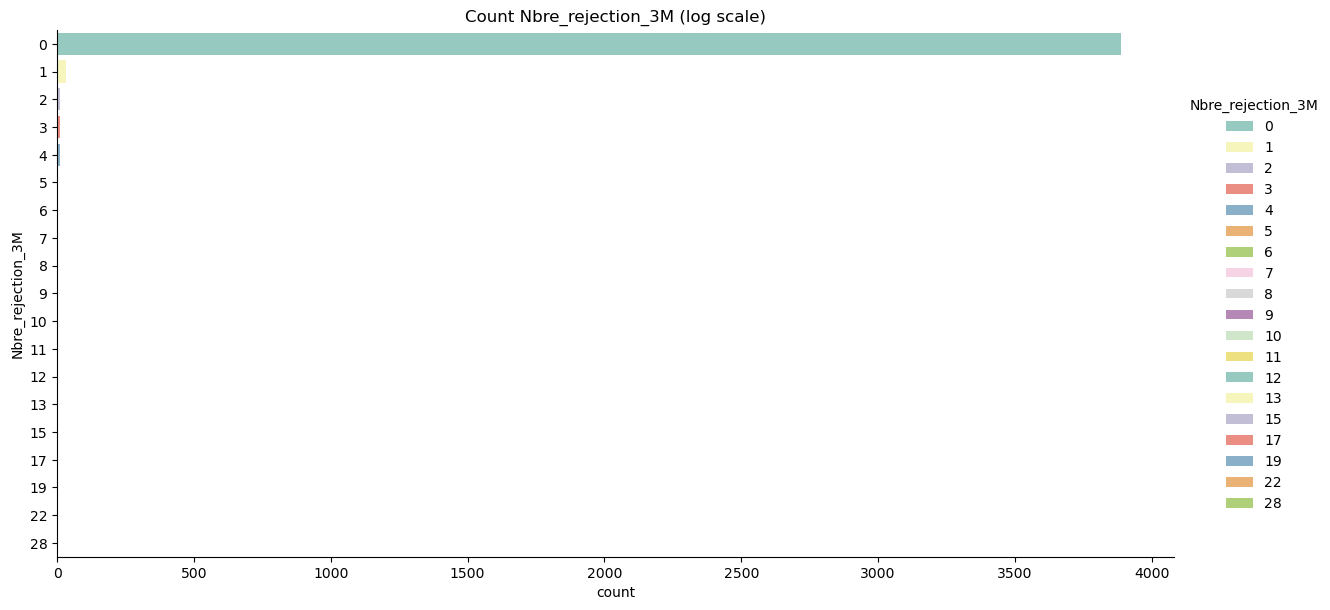

In [34]:
sns.catplot(y='Nbre_rejection_3M', kind='count', data=account_segmentées, hue='Nbre_rejection_3M', palette='Set3', height=6, aspect=2)

plt.title('Count Nbre_rejection_3M (log scale)')
plt.show()

### truc montant

In [35]:
account_segmentées[account_segmentées["defaut"]==1]["new_id"]

1103002     1983-2
1434992     2040-1
3407089     2181-2
81540       2181-1
2170432     2203-1
            ...   
2895358    49071-1
867656     49204-1
3356114    49806-1
1063209    56173-1
2228723    56175-1
Name: new_id, Length: 130, dtype: object

In [36]:
transactions_segmentées[(transactions_segmentées["new_id"]=="49071-1")&(transactions_segmentées["category_l1"]== "rejection")]

,id_bank_account,date,amount,category_l1,category_l2,new_id
2623935,49071,2022-05-12 22:00:00,-6100.00,rejection,NaN,49071-1
1810849,49071,2022-11-01 23:00:00,-12005.00,rejection,NaN,49071-1
3220129,49071,2022-06-09 22:00:00,-1824.98,rejection,NaN,49071-1
2869010,49071,2023-06-25 22:00:00,-11107.76,rejection,NaN,49071-1
968597,49071,2023-06-05 22:00:00,-11107.76,rejection,NaN,49071-1


### Somme de Reject

In [37]:
def Somme_Reject(id_bank): 
    
    Transaction_id = transactions_segmentées[transactions_segmentées['new_id'] == id_bank]
    
    date_max = Transaction_id["date"].max()
    
    D = Transaction_id[(Transaction_id["category_l1"] == "rejection") &  
                       ( Transaction_id["date"] < date_max - datetime.timedelta(days=360))]
    somme = D['amount'].sum()
    return (somme)

In [38]:
account_segmentées.loc[:, 'Somme_Reject'] = account_segmentées['new_id'].apply(Somme_Reject)

### Temps écoulé (en jours)

In [39]:
def Temps_ecoule(id_bank): 
    
    Transaction_id = transactions_segmentées[transactions_segmentées['new_id'] == id_bank]
    
    date_3M = Transaction_id["date"].max()-datetime.timedelta(days=360)
    
    D = Transaction_id[(Transaction_id["category_l1"] == "rejection") &  
                       ( Transaction_id["date"] < date_3M)]
    if len(D)!=0 :
        return (date_3M - D["date"].max()).days
    else :
        return (999)

In [40]:
account_segmentées.loc[:, 'Temps_écoulé'] = account_segmentées['new_id'].apply(Temps_ecoule)

In [41]:
account_segmentées[account_segmentées["defaut"]==1]

,new_id,max_date,defaut,Nbre_rejection_3M,Somme_Reject,Temps_écoulé
1103002,1983-2,2023-05-18 22:00:00,1,0,0.00,999
1434992,2040-1,2022-10-17 22:00:00,1,0,0.00,999
3407089,2181-2,2023-08-03 22:00:00,1,1,56.99,19
81540,2181-1,2022-04-27 22:00:00,1,0,0.00,999
2170432,2203-1,2022-12-06 23:00:00,1,0,0.00,999
...,...,...,...,...,...,...
2895358,49071-1,2023-07-06 22:00:00,1,2,-7924.98,32
867656,49204-1,2024-03-03 23:00:00,1,0,0.00,999
3356114,49806-1,2023-07-05 22:00:00,1,1,436.80,17
1063209,56173-1,2023-10-19 22:00:00,1,0,0.00,999


### Montant total des transactions sur les 3 mois.

In [42]:
def Mont_tot_3M(id_bank): 
    
    Transaction_id = transactions_segmentées[transactions_segmentées['new_id'] == id_bank]
    
    date_max = Transaction_id["date"].max()
    
    D = Transaction_id[( Transaction_id["date"] <  date_max - datetime.timedelta(days=360))]
    somme = D['amount'].sum()
    return (somme)

In [43]:
account_segmentées.loc[:, 'Mont_tot_sur_3M'] = account_segmentées['new_id'].apply(Mont_tot_3M)

In [44]:
account_segmentées[account_segmentées["defaut"]==1]

,new_id,max_date,defaut,Nbre_rejection_3M,Somme_Reject,Temps_écoulé,Mont_tot_sur_3M
1103002,1983-2,2023-05-18 22:00:00,1,0,0.00,999,-215.86
1434992,2040-1,2022-10-17 22:00:00,1,0,0.00,999,10946.81
3407089,2181-2,2023-08-03 22:00:00,1,1,56.99,19,496.63
81540,2181-1,2022-04-27 22:00:00,1,0,0.00,999,81.95
2170432,2203-1,2022-12-06 23:00:00,1,0,0.00,999,1921.23
...,...,...,...,...,...,...,...
2895358,49071-1,2023-07-06 22:00:00,1,2,-7924.98,32,810960.69
867656,49204-1,2024-03-03 23:00:00,1,0,0.00,999,-45451.43
3356114,49806-1,2023-07-05 22:00:00,1,1,436.80,17,-356.98
1063209,56173-1,2023-10-19 22:00:00,1,0,0.00,999,-4264.38


### SOLDE

In [45]:
def solde(id_bank):

    partie_entiere = int(id_bank.split('-')[0])  # Prendre tous les caractères avant "-"
    
    Transaction_id = transactions_segmentées[transactions_segmentées['new_id'] == id_bank]
    
    date_max = Transaction_id["date"].max()

    
    D = Transaction_id[( Transaction_id["date"] < date_max - datetime.timedelta(days=360))]
    date_fin_3_M = D["date"].max()
    
    
    balance = account["balance"][account["id_bank_account"]==partie_entiere].iloc[0]

    somme = balance - transaction["amount"][(transaction["date"]>=date_fin_3_M)&(transaction["id_bank_account"]==partie_entiere)].sum()
    
    return somme

In [46]:
account_segmentées.loc[:, 'SOLDE'] = account_segmentées['new_id'].apply(solde)

 Création de la variable "evolution du solde sur les derniers 3 mois"

In [47]:
def evolution(compte):
    transactions_compte = transactions_segmentées[transactions_segmentées['id_bank_account'] == compte]
    df=transactions_compte[
            (transactions_compte['date']<(max(transactions_compte['date'])- datetime.timedelta(360)))]
    
    account=accounts_segmentées[accounts['id_bank_account']==compte]
    solde_ini=account['balance'].iloc[0]
    for trans in df['amount']:
        solde_ini-=trans
    return account['balance'].iloc[0]-solde_ini


In [48]:
account_segmentées.loc[:, 'evolution_sur_3M'] = account_segmentées['new_id'].apply(evolution)

ValueError: max() iterable argument is empty

In [49]:
account_segmentées

,new_id,max_date,defaut,Nbre_rejection_3M,Somme_Reject,Temps_écoulé,Mont_tot_sur_3M,SOLDE
591450,1777-1,2023-10-11 22:00:00,0,0,0.0,999,2973.05,-12216.94
970890,1778-2,2024-03-03 23:00:00,0,0,0.0,999,2326.21,-10063.39
1957925,1778-1,2022-12-08 23:00:00,0,0,0.0,999,780.52,-17851.50
1295105,1780-3,2024-03-03 23:00:00,0,0,0.0,999,1365.91,-5479.68
3470536,1780-2,2022-12-06 23:00:00,0,0,0.0,999,683.57,-9737.07
...,...,...,...,...,...,...,...,...
513059,66054-1,2024-03-03 23:00:00,0,0,0.0,999,0.00,50.00
458077,66786-1,2024-02-25 23:00:00,0,0,0.0,999,154.47,29.39
2872200,66855-1,2024-02-29 23:00:00,0,0,0.0,999,0.00,0.00
1734081,67332-1,2024-02-26 23:00:00,0,0,0.0,999,2372.48,2400.54


In [50]:
account_segmentées.to_csv("Data.csv", index=False)

In [42]:
account_segmentées

,new_id,max_date,defaut,Nbre_rejection_3M,Somme_Reject,Temps_écoulé,Mont_tot_sur_3M,SOLDE
6161,1777-1,2023-10-11 22:00:00,0,0,0.0,999,2973.05,-12216.94
22447,1778-2,2024-03-03 23:00:00,0,0,0.0,999,2326.21,-10063.39
49,1778-1,2022-12-08 23:00:00,0,0,0.0,999,780.52,-17851.50
45659,1780-3,2024-03-03 23:00:00,0,0,0.0,999,1365.91,-5479.68
32,1780-2,2022-12-06 23:00:00,0,0,0.0,999,683.57,-9737.07
...,...,...,...,...,...,...,...,...
24926,66054-1,2024-03-03 23:00:00,0,0,0.0,999,0.00,50.00
24225,66786-1,2024-02-25 23:00:00,0,0,0.0,999,154.47,29.39
295562,66855-1,2024-02-29 23:00:00,0,0,0.0,999,0.00,0.00
25876,67332-1,2024-02-26 23:00:00,0,0,0.0,999,2372.48,2400.54


In [43]:
account_segmentées[account_segmentées["Nbre_rejection_3M"]>2]

,new_id,max_date,defaut,Nbre_rejection_3M,Somme_Reject,Temps_écoulé,Mont_tot_sur_3M,SOLDE
18,1964-2,2023-05-18 22:00:00,0,4,159.44,28,3119.76,-11192.63
135,2575-1,2022-06-12 22:00:00,1,15,2287.81,2,1666.71,-2116.35
1001,2578-1,2022-06-12 22:00:00,1,15,2287.81,2,1666.71,-2116.35
19782,2741-2,2024-03-03 23:00:00,1,5,542.92,21,-74.86,-3466.34
797,3152-1,2022-05-24 22:00:00,1,22,1197.48,9,2120.29,-7283.99
473,3184-1,2022-05-24 22:00:00,1,22,1197.48,9,2120.29,-7283.99
732,3334-1,2022-07-04 22:00:00,1,28,2166.37,2,1301.86,-3803.47
770,3336-1,2022-07-04 22:00:00,1,28,2166.37,2,1301.86,-3803.47
2492,5008-1,2022-05-31 22:00:00,1,3,364.11,4,2883.68,-10633.52
785,6903-1,2022-08-11 22:00:00,1,11,653.39,14,865.71,-4556.44


In [54]:
a=account_segmentées.drop("Somme_Reject", axis=1)

In [56]:
def Somme_Reject(id_bank): 
    
    Transaction_id = transactions_segmentées[transactions_segmentées['new_id'] == id_bank]
    
    date_max = Transaction_id["date"].max()
    
    D = Transaction_id[(Transaction_id["category_l1"] == "rejection") &  
                       ( Transaction_id["date"] < date_max - datetime.timedelta(days=360))]
    somme = D['amount'].abs().sum()
    return (somme)

In [57]:
a.loc[:, 'Somme_Reject'] = a['new_id'].apply(Somme_Reject)

In [59]:
a[a["Somme_Reject"]>0]

,new_id,max_date,defaut,Nbre_rejection_3M,Temps_écoulé,Mont_tot_sur_3M,SOLDE,Somme_Reject
820688,1964-2,2023-05-18 22:00:00,0,4,28,3119.76,-11192.63,159.44
3407089,2181-2,2023-08-03 22:00:00,1,1,19,496.63,-1332.01,56.99
180392,2203-2,2024-03-03 23:00:00,0,1,60,1144.69,-9991.07,100.00
1198039,2318-1,2022-07-06 22:00:00,1,2,11,-453.52,-3821.87,82.15
998,2575-1,2022-06-12 22:00:00,1,15,2,1666.71,-2116.35,2287.81
...,...,...,...,...,...,...,...,...
292297,51935-1,2023-08-08 22:00:00,0,3,33,330.53,116.20,300.35
1894458,57491-1,2023-11-13 23:00:00,0,1,88,-211.69,-3964.01,217.92
1189215,57513-1,2023-11-13 23:00:00,0,1,88,-211.69,-3964.01,217.92
2223003,58952-1,2024-02-25 23:00:00,0,1,63,-16.07,-2315.53,120.00


In [60]:
account_segmentées[account_segmentées["Somme_Reject"]>0]

,new_id,max_date,defaut,Nbre_rejection_3M,Somme_Reject,Temps_écoulé,Mont_tot_sur_3M,SOLDE
820688,1964-2,2023-05-18 22:00:00,0,4,159.44,28,3119.76,-11192.63
3407089,2181-2,2023-08-03 22:00:00,1,1,56.99,19,496.63,-1332.01
180392,2203-2,2024-03-03 23:00:00,0,1,100.00,60,1144.69,-9991.07
1198039,2318-1,2022-07-06 22:00:00,1,2,82.15,11,-453.52,-3821.87
998,2575-1,2022-06-12 22:00:00,1,15,2287.81,2,1666.71,-2116.35
...,...,...,...,...,...,...,...,...
292297,51935-1,2023-08-08 22:00:00,0,3,300.35,33,330.53,116.20
1894458,57491-1,2023-11-13 23:00:00,0,1,217.92,88,-211.69,-3964.01
1189215,57513-1,2023-11-13 23:00:00,0,1,217.92,88,-211.69,-3964.01
2223003,58952-1,2024-02-25 23:00:00,0,1,120.00,63,-16.07,-2315.53


In [62]:
a.to_csv("DataABS.csv", index=False)

# Test 

In [ ]:
account[account['defaut']==1]['id_bank_account']
transaction[(transaction["id_bank_account"]==69922)&(transaction["category_l1"]=='rejection')]
              

In [36]:
def segment_transactions(transaction, account):
    date_ranges = transaction.groupby('id_bank_account')['date'].agg([min, max]).rename(columns={'min': 'min_date', 'max': 'max_date'})


    account = account.merge(date_ranges, on='id_bank_account', how='left')


    segmented_transactions = []

    # Iterate over each account
    for idx, row in account.iterrows():
        compte = row['id_bank_account']
        max_date = row['max_date']
        min_date = row['min_date']

        # Calculate the number of 15-month periods
        n = ((max_date - min_date) // datetime.timedelta(days=450))

        current_max_date = max_date
        start_date = current_max_date - datetime.timedelta(days=450)

        while (n >= 1):
            period_transactions = transaction[
                (transaction['id_bank_account'] == compte) &
                (transaction['date'] >= start_date) &
                (transaction['date'] <= current_max_date)
            ].copy()

            
            period_id = f"{compte}-{n}"
            period_transactions['new_id'] = period_id

            # Append Data to the list
            segmented_transactions.append(period_transactions)

            
            current_max_date -= datetime.timedelta(days=451)
            start_date = current_max_date - datetime.timedelta(days=450)
            n -= 1

  
    transactions_segmentées = pd.concat(segmented_transactions, ignore_index=True)
    return transactions_segmentées

In [91]:
def retur_segment(id_bank,max_date):
    return transaction[trandaction["date"] in [max_date-datetime.timedelta(days=450),max_date]]
def crieation (id_bank):
    transaction_copy=transaction.copy()
    date_max = transaction["date"][transaction["id_bank_account"]==id_bank].max()
    date_min = transaction["date"][transaction["id_bank_account"]==id_bank].min()
    new_transaction_augmenté = pd.DataFrame()
    i=1
    while (date_max-datetime.timedelta(days=450)>date_min):
        D = transaction_copy[transaction_copy["date"] in  [date_max - datetime.timedelta(days=450) ]]
        D.loc[:, D.columns == 'id_bank_account'] = i
        new_transaction_augmenté = new_transaction_augmenté.append(D, ignore_index=True)
        date_max=date_max-datetime.timedelta(days=450)
        i+=1
    return new_transaction_augmenté
    

In [113]:
def creation(id_bank):
    # Création d'une copie pour éviter la modification de l'ensemble de données original
    transaction_copy = transaction.copy()
    transaction_copy['id_bank_account'] = transaction_copy['id_bank_account'].astype(str)
    # Trouver la date maximale et minimale pour les transactions spécifiques à un compte
    date_max = transaction_copy['date'][transaction_copy["id_bank_account"] == id_bank].max()
    date_min = transaction_copy['date'][transaction_copy["id_bank_account"] == id_bank].min()

    # Initialisation du DataFrame pour les transactions augmentées
    new_transaction_augmentee = pd.DataFrame()

    # Compteur pour créer de nouveaux ID de compte
    i = 1
    while (date_max - datetime.timedelta(days=450) > date_min):
        # Sélectionner les transactions dans la fenêtre de 450 jours
        D = transaction_copy[(transaction_copy["id_bank_account"] == id_bank) & 
                             (transaction_copy["date"] <= date_max) & 
                             (transaction_copy["date"] > date_max - datetime.timedelta(days=450))]

        # Attribuer un nouvel ID de compte en utilisant .loc
        D.loc[:, 'id_bank_account'] = (str(id_bank) + '-' + str(i))

        # Ajouter les transactions au nouveau DataFrame
        new_transaction_augmentee = pd.concat([new_transaction_augmentee, D], ignore_index=True)

        # Mise à jour de date_max pour la prochaine itération
        date_max -= datetime.timedelta(days=450)
        i += 1

    return new_transaction_augmentee

In [ ]:
comptes_moins_de_15_mois=[]
for compt in account["id_bank_account"] :
    a=transaction["date"][transaction['id_bank_account']==compt]
    if ((a.max()-a.min())//datetime.timedelta(days=450))==0:
        comptes_moins_de_15_mois.append(compt)
transaction_filtrées = transaction[~transaction['id_bank_account'].isin(comptes_moins_de_15_mois)]
account_filtrées = account[~account['id_bank_account'].isin(comptes_moins_de_15_mois)]
account["defaut"].value_counts()
account["defaut"].value_counts()
account_filtrées["defaut"].value_counts()

In [23]:
# Extraire le mois et l'année de la colonne 'date' et le stocker dans une nouvelle colonne 'year_month'
transaction['year_month'] = transaction['date'].dt.to_period('M')

In [24]:
transaction.head(10)

,id_bank_account,date,amount,category_l1,category_l2,year_month
515469,1777,2021-12-06 23:00:00,-6.99,unindentifiedPayments,thirdParty,2021-12
1437333,1777,2022-04-03 22:00:00,-2.99,unindentifiedPayments,thirdParty,2022-04
1437298,1777,2021-12-06 23:00:00,200.00,unindentifiedPayments,cashDeposit,2021-12
1437308,1777,2022-04-26 22:00:00,1662.93,incomes,Potentiel,2022-04
1469211,1777,2022-07-03 22:00:00,-2.99,unindentifiedPayments,thirdParty,2022-07
591450,1777,2023-05-29 22:00:00,-6.99,brands,retail,2023-05
1425092,1777,2022-11-13 23:00:00,3.03,unindentifiedPayments,thirdParty,2022-11
189632,1777,2022-04-03 22:00:00,-23.10,bankFees,servicePack,2022-04
3209564,1777,2022-08-30 22:00:00,-50.00,personalTransfer,NaN,2022-08
3457522,1777,2022-10-12 22:00:00,-68.29,unindentifiedPayments,check,2022-10


In [25]:
months_per_account = transaction.groupby('id_bank_account')['year_month'].nunique().reset_index(name='unique_months_count')

print(months_per_account)

       id_bank_account  unique_months_count
0                 1777                   28
1                 1778                   33
2                 1780                   46
3                 1781                   14
4                 1785                   32
...                ...                  ...
10572            69919                    3
10573            69920                    4
10574            69921                    2
10575            69922                    4
10576            69923                   11

[10577 rows x 2 columns]


In [58]:
f=months_per_account['id_bank_account'][months_per_account['unique_months_count']>=15]

In [59]:
f

0         1777
1         1778
2         1780
4         1785
5         1789
         ...  
9800     68300
9869     68516
9945     68868
9970     68977
10040    69164
Name: id_bank_account, Length: 2640, dtype: int64

In [38]:
transaction_15_M= transaction[transaction['id_bank_account'].isin(f)]

## Reduction de la base account

In [43]:
transaction_15_M['id_bank_account'].nunique()

2640

In [46]:
account_15_M= account[account['id_bank_account'].isin(transaction_15_M['id_bank_account'].unique())]

In [48]:
account_15_M['id_bank_account'].nunique()

2640

In [67]:
account_15_M

,id_bank_account,max_date,balance
0,1777,2023-10-11 22:00:00,-15.24
1,1778,2024-03-03 23:00:00,-443.17
2,1780,2024-03-03 23:00:00,2925.13
4,1785,2024-02-20 23:00:00,118.67
5,1789,2021-11-07 23:00:00,257.11
...,...,...,...
30247,68300,2024-03-01 23:00:00,35.50
30412,68516,2024-02-18 23:00:00,728.01
30661,68868,2024-03-01 23:00:00,123.57
30744,68977,2024-02-04 23:00:00,0.00


In [70]:
a=transaction_15_M[transaction_15_M["category_l2"]=="rejectionFees"]

In [71]:
a

,id_bank_account,date,amount,category_l1,category_l2,year_month
1271675,1780,2023-10-13 22:00:00,-20.0,overdraft,rejectionFees,2023-10
291220,1780,2021-02-12 23:00:00,-20.0,overdraft,rejectionFees,2021-02
1489262,1799,2022-06-06 22:00:00,-8.0,overdraft,rejectionFees,2022-06
3415312,1873,2022-03-07 23:00:00,-25.0,overdraft,rejectionFees,2022-03
375076,1873,2022-04-04 22:00:00,-23.0,overdraft,rejectionFees,2022-04
...,...,...,...,...,...,...
1979536,68977,2023-01-13 23:00:00,-20.0,overdraft,rejectionFees,2023-01
1161627,68977,2023-04-13 22:00:00,-20.0,overdraft,rejectionFees,2023-04
1620031,68977,2023-06-13 22:00:00,-20.0,overdraft,rejectionFees,2023-06
1109814,68977,2023-10-13 22:00:00,-5.0,overdraft,rejectionFees,2023-10


In [72]:
b = a.groupby('id_bank_account')['category_l2'].size().reset_index(name='nbre_Rejection')


In [73]:
b

,id_bank_account,nbre_Rejection
0,1780,2
1,1799,1
2,1873,4
3,1877,15
4,1900,14
...,...,...
168,49865,5
169,50847,1
170,63403,5
171,66417,1


In [74]:
f=b['id_bank_account'][b['nbre_Rejection']>=3]

In [75]:
f

2       1873
3       1877
4       1900
5       1934
6       1948
       ...  
165    47481
167    49294
168    49865
170    63403
172    68977
Name: id_bank_account, Length: 101, dtype: int64

In [76]:
(101/2109)*100


4.788999525841631